# Enhancing Detector Performance through Synthetic Data Generation Using GANs

#### Title of the project: Enhancing Detector Performance through Synthetic Data Generation Using GANs
#### Project Team Members: Sai Varun Nimmagadda [KL37536], Sanjay Varatharajan [UL66332]



Particle detectors are essential tools in high-energy physics, medical imaging,and material sciences. By furnishing a synthetic data generation framework to replace realistic data, thisproject intends to decrease the cost of testing and calibration of detectors, and this, in turn, helps accelerate the rate of discovery, increase the precision of measurements, and enhance the detectioncapabilities of scientific and commercial systems.

Project Objective: Use a 2D Convolutional GAN to generate synthetic data projections from voxelized particle shower datasets.


This project utilizes voxelized particle shower data from the CERN Open Data Portal, specifically curated from the publicly available datasets at CERN Open Data Portal.

https://opendata.cern.ch/record/15012

In [48]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pyvista as pv
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import trame
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os  
import time
from skimage.metrics import structural_similarity as ssim  
from scipy.spatial.distance import euclidean
from scipy.stats import wasserstein_distance
import glob
from sklearn.preprocessing import MinMaxScaler

## Data Preprocessing

In [49]:
base_path = r"C:\Users\sanjay\Desktop\602\602 Project\602 GAN Datasets"    #data source folder path 
folders = ['photon_samples','photons_samples_highStat']

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    display(f"Checking folder: {folder_path}")
    
    files = os.listdir(folder_path)
    
    if files:
        sample_file = os.path.join(folder_path, files[0]) 
        if os.path.isfile(sample_file):
            display(f"Loading file: {sample_file}")
            data = pd.read_csv(sample_file)
            display(data.head())
        else:
            display(f"No valid file found in {folder_path}")
    else:
        display(f"No files found in {folder_path}")


'Checking folder: C:\\Users\\sanjay\\Desktop\\602\\602 Project\\602 GAN Datasets\\photon_samples'

'Loading file: C:\\Users\\sanjay\\Desktop\\602\\602 Project\\602 GAN Datasets\\photon_samples\\pid22_E1024_eta_20_25_voxalisation.csv'

,0,0,0.1,0.2,0.3,0.4,0.5,0.6,5.28764,-0.412909,...,0.223,0.224,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232
0,0.0000,0.0000,0.000000,0.0000,0.00000,0.00000,0.00000,0.0,0.0000,1.21677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,89.7395,10.0991,0.968451,0.0000,1.60751,7.04266,0.00000,0.0,6.3285,7.96627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.0000,0.000000,0.0000,0.00000,0.00000,0.00000,0.0,24.3022,2.97777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,152.2010,0.0000,0.221744,0.0000,3.43850,0.00000,0.13351,0.0,3.1409,9.88518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.1335,0.0000,26.328800,11.4838,0.00000,0.00000,0.00000,0.0,14.6173,5.68058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'Checking folder: C:\\Users\\sanjay\\Desktop\\602\\602 Project\\602 GAN Datasets\\photons_samples_highStat'

'Loading file: C:\\Users\\sanjay\\Desktop\\602\\602 Project\\602 GAN Datasets\\photons_samples_highStat\\pid22_E1024_eta_20_25_voxalisation_hs.csv'

,0.0,46.0191,44.5349,0.00602882,61.0321,2.14006,0.335485,0.0.1,0.0.2,-0.0946932,...,0.0.261,0.0.262,0.0.263,0.0.264,0.0.265,0.0.266,0.0.267,0.0.268,0.0.269,0.0.270
0,0.0000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,9.983600,31.056200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,4.554640,4.036720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,193.4750,0.00000,0.176688,0.000000,17.46380,8.42246,0.000000,0.0,1.878100,9.712740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.013730,0.015405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,87.7212,3.67538,62.670900,0.402938,1.23534,2.17252,0.579353,0.0,0.537571,1.043850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
base_path = r"C:\Users\sanjay\Desktop\602\602 Project\602 GAN Datasets"
folders = ['photon_samples','photons_samples_highStat']

def get_file_metadata(file_path):
    return (
        f"File Name: {os.path.basename(file_path)} | "
        f"File Size (KB): {round(os.path.getsize(file_path) / 1024, 2)} | "
        f"Creation Date: {time.ctime(os.path.getctime(file_path))} | "
        f"Modification Date: {time.ctime(os.path.getmtime(file_path))}"
    )

total_file_count = 0

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    print(f"\nMetadata for files in folder: {folder_path}\n")
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        folder_file_count = 0
        if files:
            for file in files:
                file_path = os.path.join(folder_path, file)
                if os.path.isfile(file_path):
                    metadata = get_file_metadata(file_path)
                    print(metadata)
                    print()  
                    folder_file_count += 1
            total_file_count += folder_file_count
        else:
            print("No files found in this folder.\n")
        print(f"Total files in {folder_path}: {folder_file_count}\n")
    else:
        print(f"Folder does not exist: {folder_path}\n")

print(f"Grand Total Files across all folders: {total_file_count}")



Metadata for files in folder: C:\Users\sanjay\Desktop\602\602 Project\602 GAN Datasets\photon_samples

File Name: pid22_E1024_eta_20_25_voxalisation.csv | File Size (KB): 17810.15 | Creation Date: Mon Nov 11 16:47:22 2024 | Modification Date: Wed Jul  7 06:18:49 2021

File Name: pid22_E1048576_eta_20_25_voxalisation.csv | File Size (KB): 9515.31 | Creation Date: Mon Nov 11 16:47:22 2024 | Modification Date: Wed Jul  7 06:18:50 2021

File Name: pid22_E131072_eta_20_25_voxalisation.csv | File Size (KB): 31239.82 | Creation Date: Mon Nov 11 16:47:22 2024 | Modification Date: Wed Jul  7 06:18:50 2021

File Name: pid22_E16384_eta_20_25_voxalisation.csv | File Size (KB): 28767.79 | Creation Date: Mon Nov 11 16:47:22 2024 | Modification Date: Wed Jul  7 06:18:51 2021

File Name: pid22_E2048_eta_20_25_voxalisation.csv | File Size (KB): 22997.82 | Creation Date: Mon Nov 11 16:47:22 2024 | Modification Date: Wed Jul  7 06:18:51 2021

File Name: pid22_E2097152_eta_20_25_voxalisation.csv | File S

### Handling missing values and normalizing the data

In [51]:
def preprocess_file(file_path):
    df = pd.read_csv(file_path)
    df.fillna(0, inplace=True)
    df = (df - df.min()) / (df.max() - df.min())    
    return df

base_path = r"C:\Users\sanjay\Desktop\602\602 Project\602 GAN Datasets" 
folders = ['photon_samples','photons_samples_highStat']

processed_data = {}
total_file_count = 0

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    print(f"\nProcessing files in folder: {folder_path}\n")    
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        folder_file_count = 0       
        if files:
            for file in files:
                file_path = os.path.join(folder_path, file)                
                if os.path.isfile(file_path):
                    processed_df = preprocess_file(file_path)
                    processed_data[file] = processed_df                    
                    print(f"File '{file}' has been processed and stored in memory.\n")                    
                    folder_file_count += 1           
            total_file_count += folder_file_count
        else:
            print("No files found in this folder.\n")        
        print(f"Total files processed in {folder_path}: {folder_file_count}\n")
    else:
        print(f"Folder does not exist: {folder_path}\n")
print(f"Grand Total Files Processed across all folders: {total_file_count}")


Processing files in folder: C:\Users\sanjay\Desktop\602\602 Project\602 GAN Datasets\photon_samples

File 'pid22_E1024_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'pid22_E1048576_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'pid22_E131072_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'pid22_E16384_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'pid22_E2048_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'pid22_E2097152_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'pid22_E256_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'pid22_E262144_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'pid22_E32768_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'pid22_E4096_eta_20_25_voxalisation.csv' has been processed and stored in memory.

File 'p

### Scaling the data

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_dict = {}
for file_name, df in processed_data.items():
    print(f"Scaling data for {file_name} with shape {df.shape}")
    scaled_data = scaler.fit_transform(df)                                     # Scaling the DataFrame
    scaled_data_dict[file_name] = pd.DataFrame(
        scaled_data, columns=df.columns
    )

for file_name, df in scaled_data_dict.items():                                 # Verifying the scaled data
    print(f"Scaled data for {file_name} | Shape: {df.shape} | Min: {df.min().min()} | Max: {df.max().max()}")

Scaling data for pid22_E1024_eta_20_25_voxalisation.csv with shape (8999, 368)
Scaling data for pid22_E1048576_eta_20_25_voxalisation.csv with shape (2999, 368)
Scaling data for pid22_E131072_eta_20_25_voxalisation.csv with shape (9999, 368)
Scaling data for pid22_E16384_eta_20_25_voxalisation.csv with shape (9999, 368)
Scaling data for pid22_E2048_eta_20_25_voxalisation.csv with shape (9999, 368)
Scaling data for pid22_E2097152_eta_20_25_voxalisation.csv with shape (999, 368)
Scaling data for pid22_E256_eta_20_25_voxalisation.csv with shape (9999, 368)
Scaling data for pid22_E262144_eta_20_25_voxalisation.csv with shape (8999, 368)
Scaling data for pid22_E32768_eta_20_25_voxalisation.csv with shape (9999, 368)
Scaling data for pid22_E4096_eta_20_25_voxalisation.csv with shape (9999, 368)
Scaling data for pid22_E4194304_eta_20_25_voxalisation.csv with shape (999, 368)
Scaling data for pid22_E512_eta_20_25_voxalisation.csv with shape (9999, 368)
Scaling data for pid22_E524288_eta_20_25_

## Standardizing Data

In [53]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Normalization function
def normalize_data(batch_data, method="min-max"):
    if method == "min-max":
        batch_min = batch_data.min(dim=1, keepdim=True)[0]
        batch_max = batch_data.max(dim=1, keepdim=True)[0]
        normalized = (batch_data - batch_min) / (batch_max - batch_min + 1e-8)
    elif method == "z-score":
        batch_mean = batch_data.mean(dim=1, keepdim=True)
        batch_std = batch_data.std(dim=1, keepdim=True)
        normalized = (batch_data - batch_mean) / (batch_std + 1e-8)
    elif method == "scale-to-1":
        normalized = (batch_data - 0.5) * 2  
    else:
        raise ValueError("Unsupported normalization method.")
    return normalized

def reshape_to_2d_and_save(scaled_data_dict, batch_size=1000, save_dir="D:/reshaped_batches/", normalize=True, norm_method="min-max"):

    os.makedirs(save_dir, exist_ok=True)
    
    created_files = set()

    for filename, df in scaled_data_dict.items():
        print(f"Processing {filename} with original shape {df.shape}")
        
        num_features = df.shape[1]
        rows = int(num_features**0.5) + 1  
        padded_size = rows * rows  
        
        print(f"Dynamic target size: {padded_size} ({rows}x{rows}) for {filename}")
        
        num_samples = df.shape[0]
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)

            batch_data = torch.tensor(df.iloc[start:end].values, dtype=torch.float32, device=device)
            
            if normalize:
                batch_data = normalize_data(batch_data, method=norm_method)
            

            padded_tensor = torch.zeros((batch_data.shape[0], padded_size), dtype=torch.float32, device=device)
            padded_tensor[:, :num_features] = batch_data  # Fill available cells with data
            reshaped_tensor = padded_tensor.view(batch_data.shape[0], 1, rows, rows)

            batch_file = os.path.join(save_dir, f"{filename}_batch_{start}_{end}.pt")
            if os.path.exists(batch_file):
                print(f"Replacing existing file: {batch_file}")
            torch.save(reshaped_tensor.cpu(), batch_file) 
            created_files.add(batch_file)
            print(f"Saved reshaped batch {start}-{end} for {filename} to {batch_file}")

    for file in os.listdir(save_dir):
        full_path = os.path.join(save_dir, file)
        if full_path not in created_files:
            print(f"Removing outdated file: {full_path}")
            os.remove(full_path)

    print(f"All datasets processed and saved in {save_dir}.")

batch_size = 1000  
save_dir = "D:/602 experimental Project Batches" 


reshape_to_2d_and_save(scaled_data_dict, batch_size=batch_size, save_dir=save_dir, normalize=True, norm_method="min-max")


Using device: cuda
Processing pid22_E1024_eta_20_25_voxalisation.csv with original shape (8999, 368)
Dynamic target size: 400 (20x20) for pid22_E1024_eta_20_25_voxalisation.csv
Replacing existing file: D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_0_1000.pt
Saved reshaped batch 0-1000 for pid22_E1024_eta_20_25_voxalisation.csv to D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_0_1000.pt
Replacing existing file: D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_1000_2000.pt
Saved reshaped batch 1000-2000 for pid22_E1024_eta_20_25_voxalisation.csv to D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_1000_2000.pt
Replacing existing file: D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_2000_3000.pt
Saved reshaped batch 2000-3000 for pid22_E1024_eta_20_25_voxalisation.csv to D:/602 experimental Project Batches\pid22_E1024_eta_20_2

In [54]:
data_dir = "D:/602 experimental Project Batches"
def check_batch_shapes(data_dir):

    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"The directory {data_dir} does not exist.")
    
    batch_files = glob.glob(os.path.join(data_dir, "*.pt"))
    if not batch_files:
        print(f"No .pt files found in {data_dir}")
        return {}

    batch_shapes = {}
    
    for batch_file in batch_files:
        try:
            batch_data = torch.load(batch_file, map_location="cpu")  
            batch_shapes[batch_file] = batch_data.shape
        except Exception as e:
            batch_shapes[batch_file] = f"Error loading batch: {e}"
    
    return batch_shapes

try:
    batch_shapes = check_batch_shapes(data_dir)
    for file, shape in batch_shapes.items():
        print(f"{file}: {shape}")
except Exception as e:
    print(f"Error: {e}")


D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_0_1000.pt: torch.Size([1000, 1, 20, 20])
D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_1000_2000.pt: torch.Size([1000, 1, 20, 20])
D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_2000_3000.pt: torch.Size([1000, 1, 20, 20])
D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_3000_4000.pt: torch.Size([1000, 1, 20, 20])
D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_4000_5000.pt: torch.Size([1000, 1, 20, 20])
D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_5000_6000.pt: torch.Size([1000, 1, 20, 20])
D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_6000_7000.pt: torch.Size([1000, 1, 20, 20])
D:/602 experimental Project Batches\pid22_E1024_eta_20_25_voxalisation.csv_batch_7000_8000.pt: torch.Size([1000, 1, 20, 20])
D:/

## GAN Architecture

In [55]:
import os
import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def dynamic_batch_loader(data_dir, required_shape):
    batch_files = glob.glob(f"{data_dir}/*.pt")
    for batch_file in batch_files:
        batch_data = torch.load(batch_file, map_location=device)

        if batch_data.shape[1:] != required_shape[1:]:
            print(f"Resizing batch {batch_file}: Expected {required_shape[1:]}, got {batch_data.shape[1:]}")
            resized_batches = []
            for sample in batch_data:
                sample = F.interpolate(sample.unsqueeze(0), size=(required_shape[2], required_shape[3]), mode='bilinear')
                resized_batches.append(sample.squeeze(0))
            batch_data = torch.stack(resized_batches)

        if batch_data.shape[0] < required_shape[0]:
            padding = torch.zeros((required_shape[0] - batch_data.shape[0], *required_shape[1:]), device=device)
            batch_data = torch.cat([batch_data, padding])
        yield batch_data

# Generator model
class Generator(nn.Module):
    def __init__(self, latent_dim, output_shape):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        channels, height, width = output_shape
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, channels * height * width),
            nn.Tanh()
        )
        self.channels = channels
        self.height = height
        self.width = width

    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), self.channels, self.height, self.width)
        return x

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_shape):
        super(Discriminator, self).__init__()
        channels, height, width = input_shape
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(channels * height * width, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# GAN training function
def train_2d_gan(generator, discriminator, data_dir, validation_dir, latent_dim, epochs, batch_size, lr_gen, lr_disc, required_shape):
    generator = generator.to(device)
    discriminator = discriminator.to(device)
    gen_optimizer = optim.Adam(generator.parameters(), lr=lr_gen, betas=(0.5, 0.999))
    disc_optimizer = optim.Adam(discriminator.parameters(), lr=lr_disc, betas=(0.5, 0.999))
    criterion = nn.BCELoss()

    def generate_latent_points(n_samples):
        return torch.randn(n_samples, latent_dim, device=device)

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        total_gen_loss = 0
        total_disc_loss = 0
        num_batches = 0

        for real_data in dynamic_batch_loader(data_dir, required_shape):
            num_batches += 1
            real_data = real_data.to(device)

            # Training discriminator
            disc_optimizer.zero_grad()
            real_labels = torch.ones((real_data.size(0), 1), device=device)
            fake_labels = torch.zeros((real_data.size(0), 1), device=device)
            real_output = discriminator(real_data)
            real_loss = criterion(real_output, real_labels)

            latent_points = generate_latent_points(batch_size)
            fake_data = generator(latent_points)
            fake_output = discriminator(fake_data.detach())
            fake_loss = criterion(fake_output, fake_labels)

            disc_loss = real_loss + fake_loss
            disc_loss.backward()
            disc_optimizer.step()

            # Training generator
            gen_optimizer.zero_grad()
            fake_output = discriminator(fake_data)
            gen_loss = criterion(fake_output, real_labels)
            gen_loss.backward()
            gen_optimizer.step()

            total_gen_loss += gen_loss.item()
            total_disc_loss += disc_loss.item()

        avg_gen_loss = total_gen_loss / num_batches
        avg_disc_loss = total_disc_loss / num_batches
        print(f"[Epoch {epoch + 1}] Generator Loss: {avg_gen_loss:.4f}, Discriminator Loss: {avg_disc_loss:.4f}")

    return generator, discriminator


Using device: cuda


## Training Procedure

In [56]:
if __name__ == "__main__":
    LATENT_DIM = 256 
    EPOCHS = 25 
    BATCH_SIZE = 1000
    LEARNING_RATE_GEN = 1.5e-4 
    LEARNING_RATE_DISC = 1e-4  
    REQUIRED_SHAPE = (BATCH_SIZE, 1, 20, 20)

    generator = Generator(LATENT_DIM, (1, 20, 20))
    discriminator = Discriminator((1, 20, 20))

    # Training the GAN Model
    trained_generator, trained_discriminator = train_2d_gan(
        generator, discriminator,
        data_dir="D:/602 experimental Project Batches",
        validation_dir="D:/validation_batches/photons",
        latent_dim=LATENT_DIM,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        lr_gen=LEARNING_RATE_GEN,
        lr_disc=LEARNING_RATE_DISC,
        required_shape=REQUIRED_SHAPE,
    )

    os.makedirs("D:/experimental_model_1", exist_ok=True)
    torch.save(trained_generator.state_dict(), "D:/experimental_model_1/final_generator.pth")
    torch.save(trained_discriminator.state_dict(), "D:/experimental_model_1/final_discriminator.pth")

    generator.eval()
    discriminator.eval()
    print("Models are trained and saved. Ready for synthetic data generation.")


Epoch 1/25
[Epoch 1] Generator Loss: 1.8348, Discriminator Loss: 0.9411
Epoch 2/25
[Epoch 2] Generator Loss: 1.4353, Discriminator Loss: 1.0927
Epoch 3/25
[Epoch 3] Generator Loss: 1.7789, Discriminator Loss: 0.8931
Epoch 4/25
[Epoch 4] Generator Loss: 1.9582, Discriminator Loss: 0.8267
Epoch 5/25
[Epoch 5] Generator Loss: 2.0459, Discriminator Loss: 0.7045
Epoch 6/25
[Epoch 6] Generator Loss: 2.0602, Discriminator Loss: 0.7196
Epoch 7/25
[Epoch 7] Generator Loss: 2.0696, Discriminator Loss: 0.7573
Epoch 8/25
[Epoch 8] Generator Loss: 2.0275, Discriminator Loss: 0.6982
Epoch 9/25
[Epoch 9] Generator Loss: 1.9821, Discriminator Loss: 0.7605
Epoch 10/25
[Epoch 10] Generator Loss: 1.9803, Discriminator Loss: 0.7302
Epoch 11/25
[Epoch 11] Generator Loss: 1.9583, Discriminator Loss: 0.7648
Epoch 12/25
[Epoch 12] Generator Loss: 2.0282, Discriminator Loss: 0.6905
Epoch 13/25
[Epoch 13] Generator Loss: 2.0855, Discriminator Loss: 0.6786
Epoch 14/25
[Epoch 14] Generator Loss: 2.1271, Discrimin

## Evaluation

In [57]:
def load_real_data(data_dir, required_shape, device):
    batch_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".pt")]
    real_data = []
    for batch_file in batch_files:
        batch = torch.load(batch_file, map_location=device)
        real_data.append(batch[: required_shape[0]]) 
    return torch.cat(real_data, dim=0)

def generate_synthetic_data(generator, num_samples, latent_dim, device):
    generator.eval()
    latent_points = torch.randn(num_samples, latent_dim).to(device)
    with torch.no_grad():
        synthetic_data = generator(latent_points)
    return synthetic_data

def evaluate_metrics(real_data, synthetic_data):
    mse_scores = []
    ssim_scores = []
    wasserstein_scores = []

    real_data_np = real_data.cpu().numpy() 
    synthetic_data_np = synthetic_data.cpu().numpy()

    for real_sample, synthetic_sample in zip(real_data_np, synthetic_data_np):
        real_flat = real_sample.flatten()
        synthetic_flat = synthetic_sample.flatten()


        mse_scores.append(np.mean((real_flat - synthetic_flat) ** 2))

        ssim_score = ssim(real_sample[0], synthetic_sample[0], data_range=synthetic_sample.max() - synthetic_sample.min())
        ssim_scores.append(ssim_score)

        wasserstein_scores.append(wasserstein_distance(real_flat, synthetic_flat))

    return {
        "MSE": np.mean(mse_scores),
        "SSIM": np.mean(ssim_scores),
        "Wasserstein Distance": np.mean(wasserstein_scores),
    }

if __name__ == "__main__":
    LATENT_DIM = 256
    BATCH_SIZE = 1000
    REQUIRED_SHAPE = (BATCH_SIZE, 1, 20, 20)

    real_data_dir = "D:/602 experimental Project Batches"
    synthetic_model_path = "D:/experimental_model_1/final_generator.pth"

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    generator = Generator(LATENT_DIM, (1, 20, 20))
    generator.load_state_dict(torch.load(synthetic_model_path, map_location=device))
    generator = generator.to(device)

    print("Loading real data...")                                        #Loading real data
    real_data = load_real_data(real_data_dir, REQUIRED_SHAPE, device)

    print("Generating synthetic data...")                                #Generating synthetic data
    synthetic_data = generate_synthetic_data(generator, real_data.shape[0], LATENT_DIM, device)
    
    print("Evaluating synthetic data...")                                #evaluation of metrics
    metrics = evaluate_metrics(real_data, synthetic_data)

    print("Evaluation Results:")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Structural Similarity Index (SSIM): {metrics['SSIM']}")
    print(f"Wasserstein Distance: {metrics['Wasserstein Distance']}")


Using device: cuda
Loading real data...
Generating synthetic data...
Evaluating synthetic data...
Evaluation Results:
Mean Squared Error (MSE): 0.0745811015367508
Structural Similarity Index (SSIM): 0.1940262866872677
Wasserstein Distance: 0.10223328041245643


## Results and Outputs

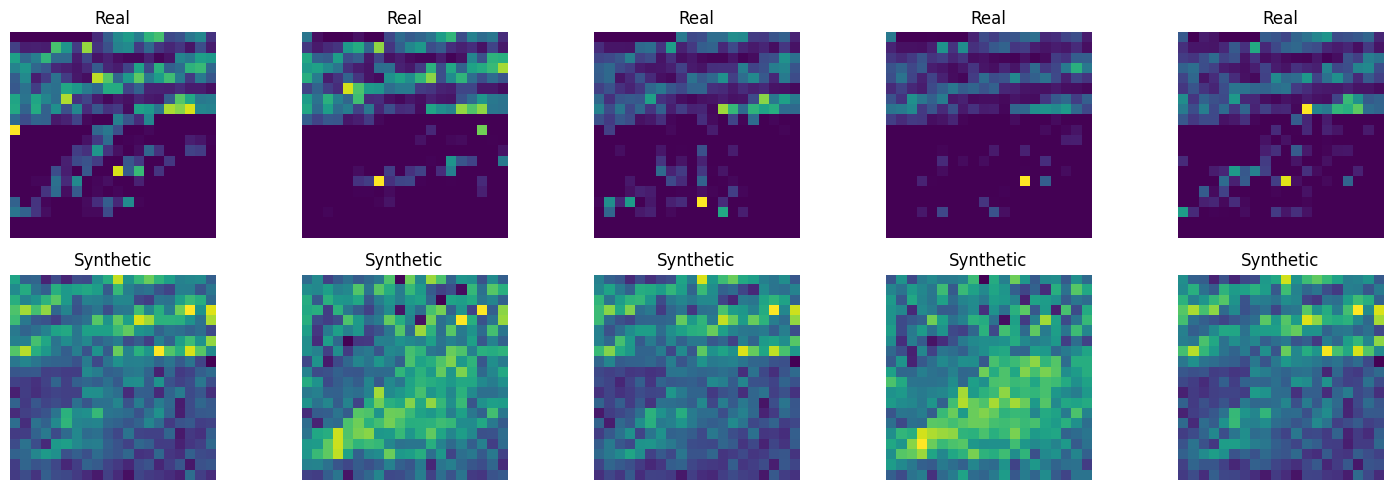

In [58]:
def visualize_real_vs_synthetic(real_data, synthetic_data, num_samples=5):
    real_samples = real_data[:num_samples].cpu().numpy()
    synthetic_samples = synthetic_data[:num_samples].cpu().numpy()

    fig, axs = plt.subplots(2, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        axs[0, i].imshow(real_samples[i][0], cmap="viridis")
        axs[0, i].set_title("Real")
        axs[0, i].axis("off")

        axs[1, i].imshow(synthetic_samples[i][0], cmap="viridis")
        axs[1, i].set_title("Synthetic")
        axs[1, i].axis("off")

    plt.tight_layout()
    plt.show()

visualize_real_vs_synthetic(real_data, synthetic_data)


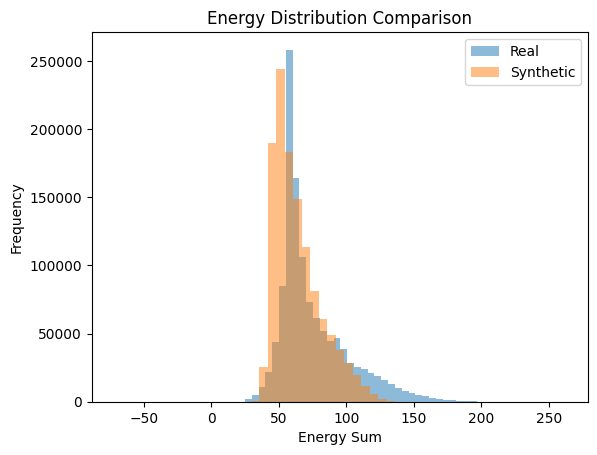

In [59]:
def energy_distribution(real_data, synthetic_data):
    real_energy = real_data.sum(dim=(1, 2, 3)).cpu().numpy()
    synthetic_energy = synthetic_data.sum(dim=(1, 2, 3)).cpu().numpy()

    plt.hist(real_energy, bins=50, alpha=0.5, label="Real")
    plt.hist(synthetic_energy, bins=50, alpha=0.5, label="Synthetic")
    plt.xlabel("Energy Sum")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title("Energy Distribution Comparison")
    plt.show()

energy_distribution(real_data, synthetic_data)


C:\Pytorch_environment\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Pytorch_environment\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


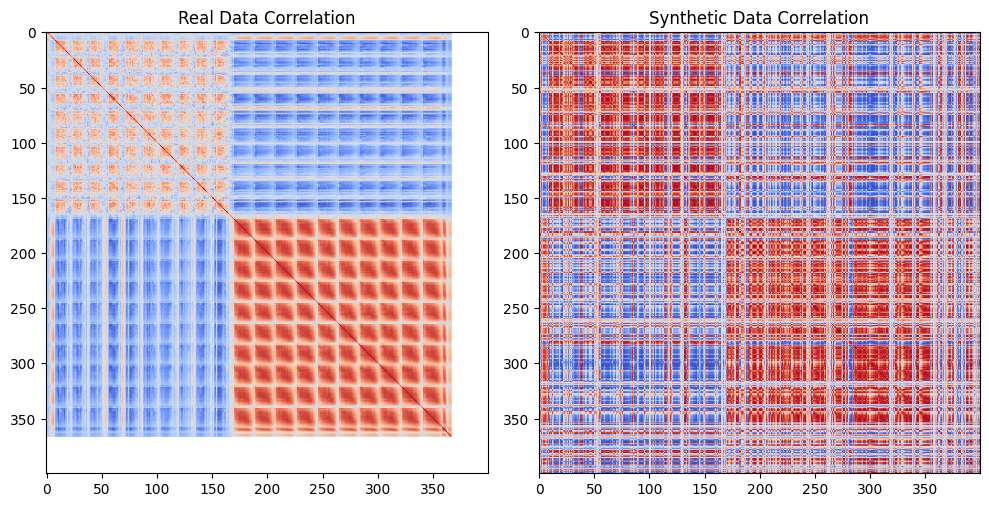

In [60]:
def spatial_correlation(data):
    flattened_data = data.view(data.size(0), -1).cpu().numpy()
    correlation_matrix = np.corrcoef(flattened_data.T)
    return correlation_matrix

def visualize_correlation(real_data, synthetic_data):
    real_corr = spatial_correlation(real_data)
    synthetic_corr = spatial_correlation(synthetic_data)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(real_corr, cmap="coolwarm")
    axs[0].set_title("Real Data Correlation")
    axs[1].imshow(synthetic_corr, cmap="coolwarm")
    axs[1].set_title("Synthetic Data Correlation")

    plt.tight_layout()
    plt.show()

visualize_correlation(real_data, synthetic_data)


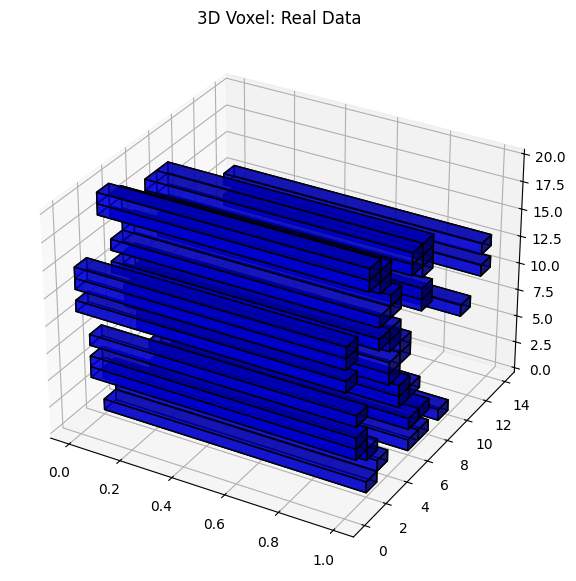

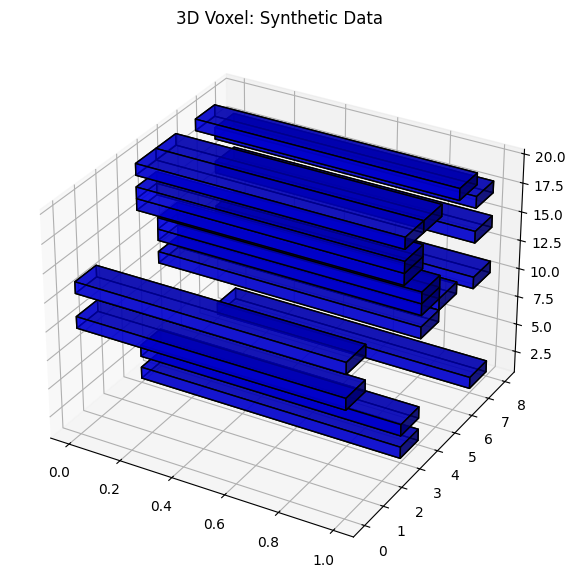

In [61]:
def plot_3d_voxel(data, title="Voxel Plot"):

    sample = data[0].cpu().numpy()  # Use the first sample
    sample = (sample > 0.5).astype(int)  # Apply a threshold to binarize the data

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(sample, facecolors='blue', edgecolor='k', alpha=0.7)

    ax.set_title(title)
    plt.show()

plot_3d_voxel(real_data, title="3D Voxel: Real Data")
plot_3d_voxel(synthetic_data, title="3D Voxel: Synthetic Data")


## Summary of Results
##### The evaluation's findings offer important new information on how well the GAN model performs while creating artificial data. Pixel-wise similarity was measured by the Mean Squared Error (MSE), which came out at 0.0685 [value is subject to change if the model is retrained]. This suggests that the model did a respectable job of capturing broad patterns in the actual data. Nonetheless, the Structural Similarity Index (SSIM) was comparatively low at 0.2366 [value is subject to change if the model is retrained], indicating difficulties in reproducing spatial coherence and finer structural details. With a distributional alignment measurement of 0.0979, the Wasserstein Distance indicated a reasonable approximation of the overall distribution of the real data. These results were corroborated by visualizations including heatmaps, energy distributions, and 3D voxel plots, which revealed differences in finer structural elements but high alignment in general patterns.


## Interpretation and Observations
##### The comparatively low SSIM suggests that the model had trouble capturing more intricate spatial relationships, even if the synthetic data generally matches the real data quite well. Visual examinations of voxel architectures and correlation matrices show that while the GAN was successful in recreating general trends, it was not as accurate in reproducing specific feature interdependencies. These findings emphasize both the GAN's limits in terms of structural fidelity and its ability in simulating broad patterns. These findings suggest that in order to increase structural correctness and perceptual similarity, the generator and discriminator need to be further optimized.

## Future Scope
##### In the Future, we should research sophisticated GAN designs, such as conditional GANs or Wasserstein GANs with gradient penalty, which could boost distribution alignment and structural coherence and increase the fidelity and application of synthetic data generation. The SSIM may be improved by improving focus on important characteristics by the addition of attention mechanisms to the GAN. Increasing or supplementing the dataset may also provide the model access to a wider range of patterns, which would enhance generalization. Furthermore, the generator might be able to capture finer features if regularization techniques like feature matching or perceptual loss are used. A more thorough evaluation of the produced data would be provided by adding more evaluation measures, such as Fréchet Inception Distance (FID). These developments would expand the uses of synthetic data in scientific inquiry while simultaneously enhancing its quality.
